# Using Data Manipulation, Cleaning and Visualization Techniques on Recall Dataset from NHTSA

In this script various data analysis techniques used to analize data on recalls about motor vehicles and equipment. This dataset gathered from National Highway Traffic Safety Administration (NHTSA) and it can be accessed from [here](https://catalog.data.gov/dataset/recalls-data).

## About the Dataset
The dataset includes recall information related to specific NHTSA campaigns. The dataset has 4 different recall type: tires, vehicles, car seats, and equipment. The earliest campaign data is from 1966. The dataset gathered on 4th September 2021.

## Table of Contents
1. Data Cleaning
2. Recall and Potentially Affected Count by Each Year


## **1. Data Cleaning**
In this section we are going to deal with missing values and we are going to view the dataset.

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np 
import os 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Getting the current working directory.
pwd = os.getcwd()
filepath_recalls = pwd + "\\Recalls_Data.csv"

In [3]:
# Importing the dataset and viewing the first 3 row.
dataset = pd.read_csv(filepath_recalls)
dataset.head(3)

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action
0,08/30/2021,21V674000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Vermeer Manufacturing Company,Chipper Discharge Chute May Separate,EQUIPMENT,IK4126,Vehicle,38.0,Vermeer Manufacturing Company (Vermeer) is rec...,A separated chipper discharge chute can become...,"Dealers will install a field remedy kit, free ..."
1,08/30/2021,21V675000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Subaru of America, Inc.",Lower Control Arm Weld Failure,SUSPENSION,WRI-21,Vehicle,802.0,"Subaru of America, Inc. (Subaru) is recalling ...",A separated control arm may cause the tire to ...,Owners are advised not to drive their vehicle ...
2,08/29/2021,21V672000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Gracie Ind. LLC d/b/Bolt Custom Trucks,Window Adhesive Failure,EQUIPMENT,Lippert 21E047,Vehicle,340.0,Gracie Ind. LLC d/b/Bolt Custom Trucks (Bolt C...,Adhesive failure may cause the vent portion of...,"Dealers will inspect the windows, and replace ..."


In [4]:
dataset.shape

(25180, 12)

In [5]:
# First make a copy of the dataset to a new dataframe. This allows us to easily turn back to the old data without importing again.
df_year = dataset.copy()
# Create a new column named "Year". Get the year value from "Report Received Date" column using map and lambda functions and put the values to the new column.
df_year["Year"] = df_year["Report Received Date"].map(lambda x: int(x.split("/")[2])) 

In [6]:
df_year.head(3)

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Year
0,08/30/2021,21V674000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Vermeer Manufacturing Company,Chipper Discharge Chute May Separate,EQUIPMENT,IK4126,Vehicle,38.0,Vermeer Manufacturing Company (Vermeer) is rec...,A separated chipper discharge chute can become...,"Dealers will install a field remedy kit, free ...",2021
1,08/30/2021,21V675000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Subaru of America, Inc.",Lower Control Arm Weld Failure,SUSPENSION,WRI-21,Vehicle,802.0,"Subaru of America, Inc. (Subaru) is recalling ...",A separated control arm may cause the tire to ...,Owners are advised not to drive their vehicle ...,2021
2,08/29/2021,21V672000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Gracie Ind. LLC d/b/Bolt Custom Trucks,Window Adhesive Failure,EQUIPMENT,Lippert 21E047,Vehicle,340.0,Gracie Ind. LLC d/b/Bolt Custom Trucks (Bolt C...,Adhesive failure may cause the vent portion of...,"Dealers will inspect the windows, and replace ...",2021


In [7]:
# Let's check how many missing values we have in every column.
df_year.isnull().sum()

Report Received Date       0
NHTSA ID                   0
Recall Link                0
Manufacturer               0
Subject                    0
Component                  0
Mfr Campaign Number       24
Recall Type                0
Potentially Affected      46
Recall Description      2401
Consequence Summary     4888
Corrective Action       2388
Year                       0
dtype: int64

First of all we have 5 columns which has missing values. If we look at these columns we can see that only 2 columns ("Mfr Campaing Number" and "Potentially Affected") that are important for analysis. The other 3 is for descriptions. So we have to do something about these columns. There is three methods we can use, first we can guess these values, for example getting mean value for that column, and inserting the new values. But this method only works for integer columns and therefore we can only use it in the "Potentially Affected" column. So we have to do something different for the "Mfr Campaign Number" column. The second method we can use is inserting values like ("Unknown" or "Missing") for string columns and ("0") for integer columns. This allows us to keep the information if thats the main goal. But problem with that is if we insert "0" to "Potentially Affected" column that will change our analysis because each row represents a recall and every recalls has to affected some vehicles or equipment. If we put "0" that makes no sense. So thats leads us to third method which is deleting rows with missing values. In this dataset it will be okay to delete all rows with missing values because we only have 70 rows to deal with in 2 columns. Which is to small in 25180 rows of data, it probably won't effect too much of the analysis. For the "Mfs Campaign Number" column we are going to change missing values with "Unknown".

In [8]:
# First let's look at the missing values from "Potentially Affected" column.
df_year[df_year["Potentially Affected"].isna()].iloc[:3]

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Year
51,08/11/2021,21E073000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,S&S Truck Parts,Warning Triangle Insufficiently Visible/FMVSS 125,EQUIPMENT,NR (Not Reported),Equipment,NaN,"S&S Truck Parts, Inc. (S&S Truck) is recalling...",The warning triangles may be insufficiently vi...,No remedy has been established at this time. ...,2021
68,08/05/2021,21V610000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Tiffin Motorhomes, Inc.",Frame Rail Hitch Extensions May Fail,TRAILER HITCHES,WAY-101,Vehicle,NaN,"Tiffin Motorhomes, Inc. (Tiffin) is recalling ...",Extension failure can cause the hitch to detac...,The remedy is still under development. Owner ...,2021
242,06/17/2021,21V456000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Terex Advance Mixer, Inc.",Unintentional Chute Movement,EQUIPMENT,NR (Not Reported),Vehicle,NaN,"Terex Advance Mixer, Inc. (Terex) is recalling...",A chute that moves unintentionally can increas...,The remedy is still under development. The ma...,2021


In [10]:
# Let's look at the "Mfr Campaign Number" as well.
df_year[df_year["Mfr Campaign Number"].isna()].iloc[:3]

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Year
245,06/14/2021,21E052000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Autoliv, Inc.",Automatic Locking Retractor Malfunction/FMVSS 208,SEAT BELTS,NaN,Equipment,266772.0,"Autoliv, Inc. (Autoliv) is recalling certain A...",A seat belt retractor that does not function a...,Autoliv will work with the vehicle manufacture...,2021
247,06/14/2021,21E051000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Wallace Forge Company,Mount Couplers May Cause Trailer to Uncouple,EQUIPMENT,NaN,Equipment,7721.0,Wallace Forge Company (Wallace Forge) is recal...,Excessive play of the mount coupler can cause ...,"Dealer will replace the coupler, free of charg...",2021
310,05/25/2021,21V384000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Life Line Emergency Vehicles,Rear Brake Caliper Flexible Line May Leak,"SERVICE BRAKES, HYDRAULIC",NaN,Vehicle,36.0,Life Line Emergency Vehicles (Life Line) is re...,A brake fluid leak can cause a loss of brakes ...,Dealers will modify the rear brake caliper fle...,2021


Now we can remove and edit our missing values. First we are going to get the copy of our dataframe again. That way if we do something wrong in the data we don't need to run the code above again. After copying the dataframe let's drop missing values first on "Potentially Affected" column. After dropping the values we can finally change missing values to "Unknown" in "Mfr Campaign Number" column. Finally let's check missing values again to see if everything went okay.


In [12]:
df_na_droppped = df_year.copy()
df_na_droppped.dropna(subset=['Potentially Affected'], inplace=True)
df_na_droppped.fillna({'Mfr Campaign Number': "Unknown"}, inplace=True)
df_na_droppped.isnull().sum()

Report Received Date       0
NHTSA ID                   0
Recall Link                0
Manufacturer               0
Subject                    0
Component                  0
Mfr Campaign Number        0
Recall Type                0
Potentially Affected       0
Recall Description      2401
Consequence Summary     4888
Corrective Action       2388
Year                       0
dtype: int64

In [14]:
# Let's double check and see a row with missing value from 3 blocks above. We can see here the columns value changed into "Unknown".
df_na_droppped[df_na_droppped["NHTSA ID"] == "21V384000"]

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Year
310,05/25/2021,21V384000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Life Line Emergency Vehicles,Rear Brake Caliper Flexible Line May Leak,"SERVICE BRAKES, HYDRAULIC",Unknown,Vehicle,36.0,Life Line Emergency Vehicles (Life Line) is re...,A brake fluid leak can cause a loss of brakes ...,Dealers will modify the rear brake caliper fle...,2021


## **2. Recall and Potentially Affected Count by Each Year**
In this section we are going to get information from the data with manipulation techniques and visualize them.

In [15]:
# First we are going to group the data by year and we are going to count each recall in every year using "NHTSA ID" column. Next we are going to get the total value of "Potentially Affected" column each year.
df_recall_count_with_affected = df_na_droppped.groupby("Year").agg({"NHTSA ID": 'count', "Potentially Affected": "sum"}).reset_index().sort_values(by="Year", ascending=False)
df_recall_count_with_affected.rename(columns={"NHTSA ID": "Recall Count"}, inplace=True)

In [16]:
# Let's look at the data
df_recall_count_with_affected

,Year,Recall Count,Potentially Affected
55,2021,729,27438309.0
54,2020,883,56084498.0
53,2019,964,53066160.0
52,2018,1032,35384950.0
51,2017,897,42653947.0
50,2016,1031,76071414.0
49,2015,970,86307293.0
48,2014,869,60369817.0
47,2013,708,26289461.0
46,2012,660,18281264.0


Now it's time to visualize the data with visualization techniques.

<AxesSubplot:xlabel='Year', ylabel='Recall Count'>

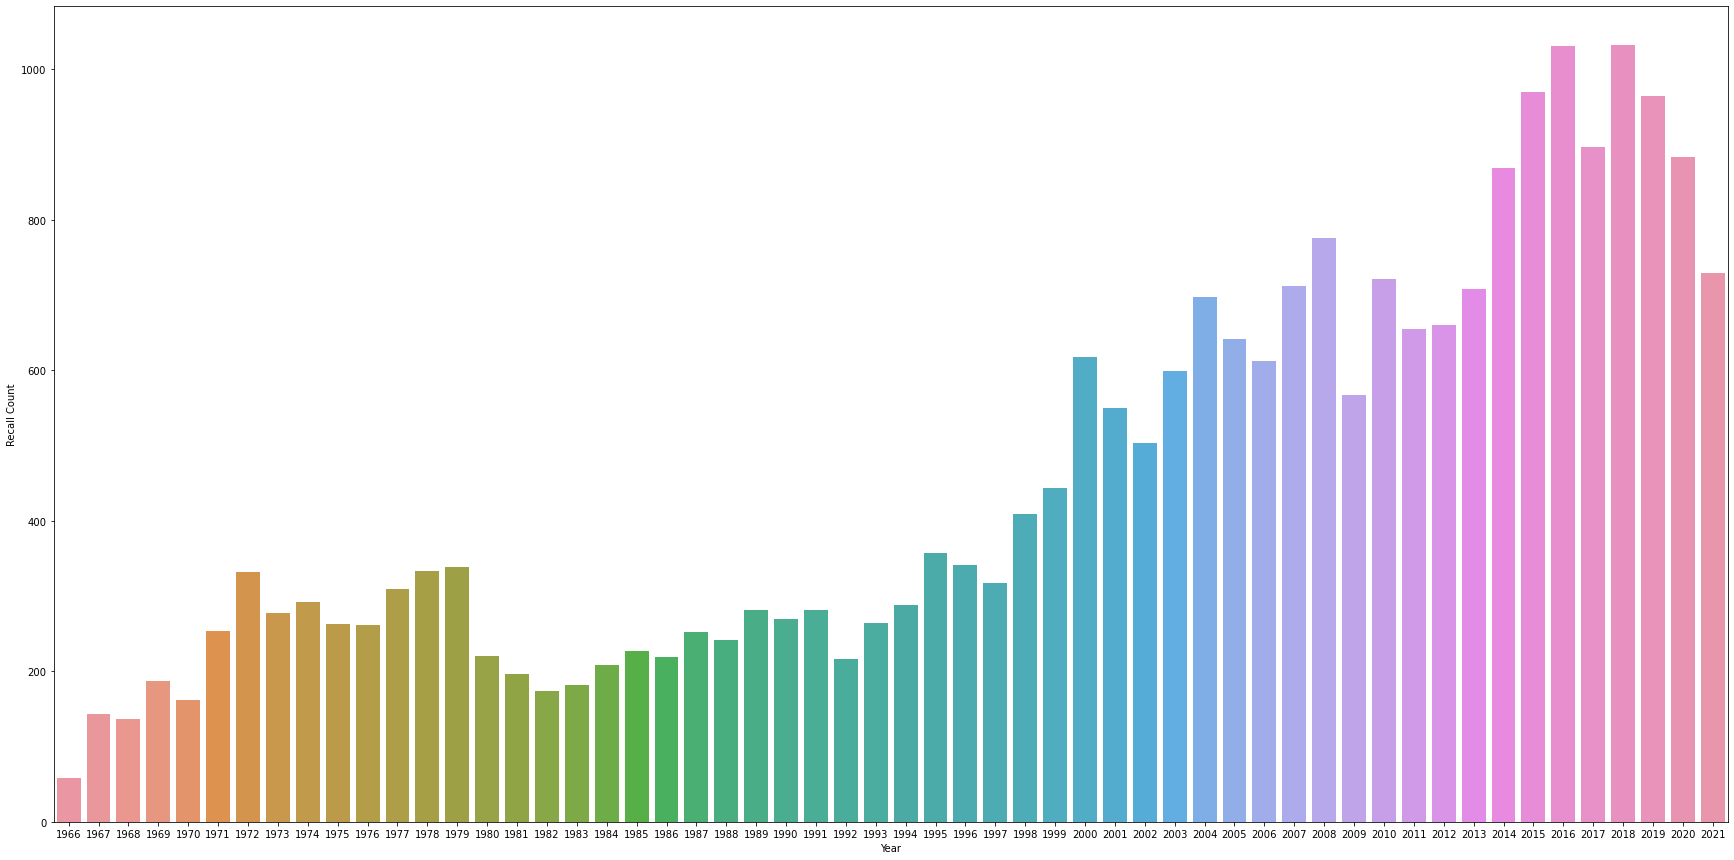

In [17]:
# Let's create a barplot using Seaborn library. Set the x axis to year and y axis to recall count.
plt.figure(figsize=(30,15))
sns.barplot(x=df_recall_count_with_affected["Year"], y=df_recall_count_with_affected["Recall Count"])

As we can see here as the time goes on the recall count gets higher especially after mid 90's. The reason for this probably would be the increasing new vehicle sales because population gets higher every year and demand for new vehicles also get higher every year. The other reason would be the vehicles getting old and they discover design faults in the vehicles.

<AxesSubplot:xlabel='Year', ylabel='Potentially Affected'>

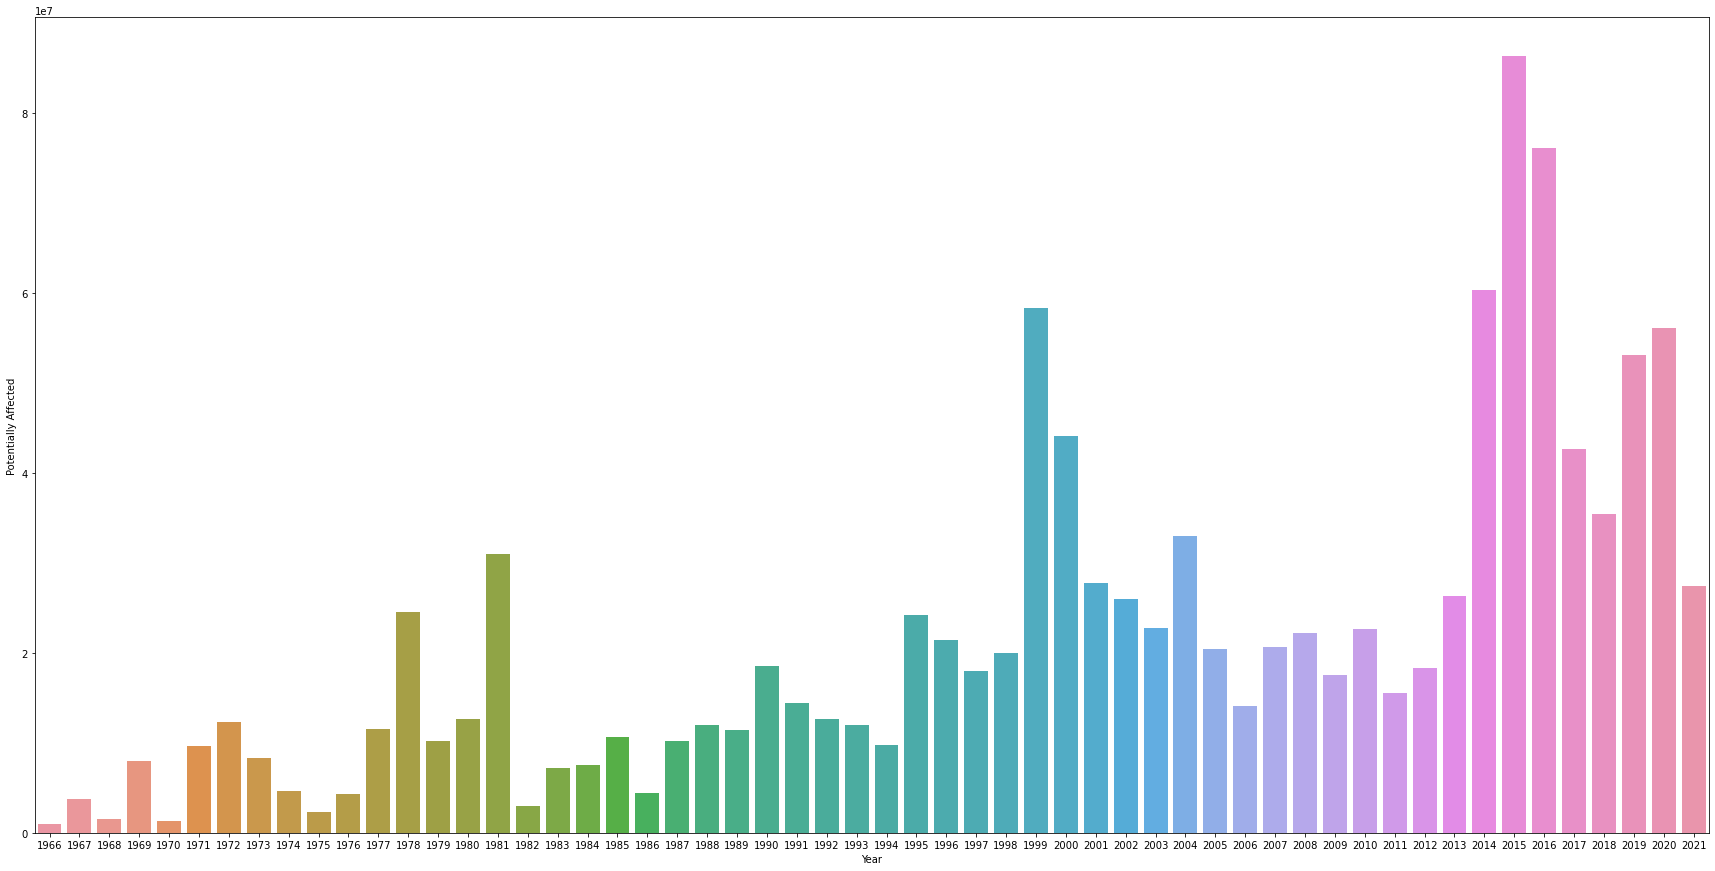

In [18]:
# Let's look at the potentially affected as well.
plt.figure(figsize=(30,15))
sns.barplot(x=df_recall_count_with_affected["Year"], y=df_recall_count_with_affected["Potentially Affected"])

We can also see in here that affected vehicle value gets higher each year due to increasing of vehicles each year.

<AxesSubplot:xlabel='Year', ylabel='Potentially Affected'>

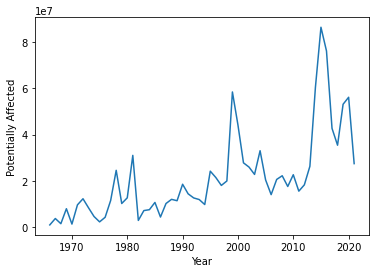

In [25]:
# Let's look at the other useful graphs as well.
sns.lineplot(x="Year", y="Potentially Affected", data=df_recall_count_with_affected)

<AxesSubplot:xlabel='Year', ylabel='Potentially Affected'>

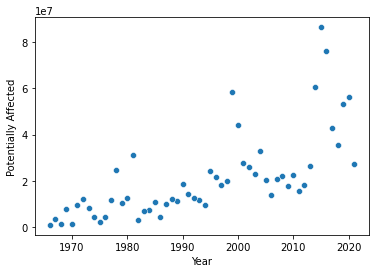

In [24]:
sns.scatterplot(x="Year", y="Potentially Affected", data=df_recall_count_with_affected)

<AxesSubplot:xlabel='Year', ylabel='Recall Count'>

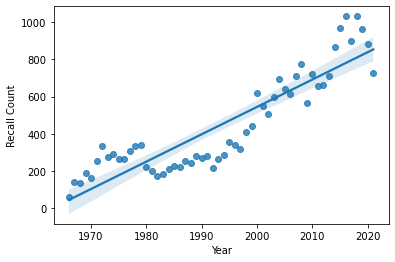

In [26]:
sns.regplot(x="Year", y="Recall Count", data=df_recall_count_with_affected)

In [27]:
# If we want to save this values to a csv or excel we can uncomment below lines and save them.
df_recall_count_with_affected.to_excel(pwd+"\\Years_Output_excel.xlsx", index=False, sheet_name="Total Recall Count By Each Year")
df_recall_count_with_affected.to_csv(pwd+"\\Years_Output_csv.csv", index=False)